In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import df
df = pd.read_csv (r"C:\Users\nldersj1\OneDrive - EY\Documents\Ironhack\completedataframe.csv", index_col=0)

In [3]:
# check
df.head()

,Tweetcount,Sentiment,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,78,0.062761,1629742080000,2021-08-23 18:08:00,BTCUSD,49458.32,49476.79,49454.92,49476.79,0.648097
1,194,0.065803,1629742140000,2021-08-23 18:09:00,BTCUSD,49476.79,49499.21,49432.71,49465.53,1.774996
2,194,0.078320,1629742200000,2021-08-23 18:10:00,BTCUSD,49465.53,49480.58,49458.25,49462.22,0.066821
3,152,0.085463,1629742260000,2021-08-23 18:11:00,BTCUSD,49462.22,49462.22,49428.58,49431.21,0.309803
4,190,0.073699,1629742320000,2021-08-23 18:12:00,BTCUSD,49431.21,49447.46,49409.02,49447.37,0.321633


In [4]:
# change date to datetime
df['Date'] = pd.to_datetime(df.Date)

In [5]:
# check
df.dtypes

Tweetcount                 int64
Sentiment                float64
Unix Timestamp             int64
Date              datetime64[ns]
Symbol                    object
Open                     float64
High                     float64
Low                      float64
Close                    float64
Volume                   float64
dtype: object

In [6]:
sns.displot(df, x='Close')

In [7]:
df.hist(bins=15, figsize=(15, 6), layout=(2, 9));

In [8]:
sns.pairplot(df)

In [9]:
sns.regplot(y='Close', x='Tweetcount', data=df)

<AxesSubplot:xlabel='Tweetcount', ylabel='Close'>

In [10]:
sns.regplot(y='Close', x='Sentiment', data=df)

<AxesSubplot:xlabel='Sentiment', ylabel='Close'>

In [11]:
correlationsmatrix = df.corr()
correlationsmatrix

,Tweetcount,Sentiment,Unix Timestamp,Open,High,Low,Close,Volume
Tweetcount,1.000000,0.035959,-0.024208,0.119264,0.107837,0.255158,0.231216,-0.279417
Sentiment,0.035959,1.000000,0.005868,0.244053,0.312670,0.327120,0.357467,-0.000482
Unix Timestamp,-0.024208,0.005868,1.000000,0.121235,0.078409,0.012680,-0.007211,0.224271
Open,0.119264,0.244053,0.121235,1.000000,0.952133,0.937733,0.884434,-0.141348
High,0.107837,0.312670,0.078409,0.952133,1.000000,0.928644,0.942949,-0.135818
Low,0.255158,0.327120,0.012680,0.937733,0.928644,1.000000,0.966350,-0.261844
Close,0.231216,0.357467,-0.007211,0.884434,0.942949,0.966350,1.000000,-0.234153
Volume,-0.279417,-0.000482,0.224271,-0.141348,-0.135818,-0.261844,-0.234153,1.000000


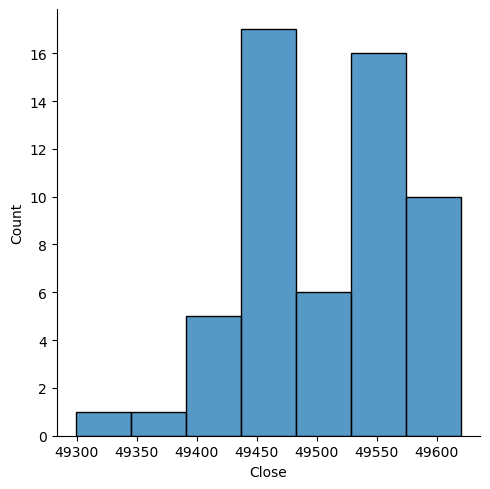

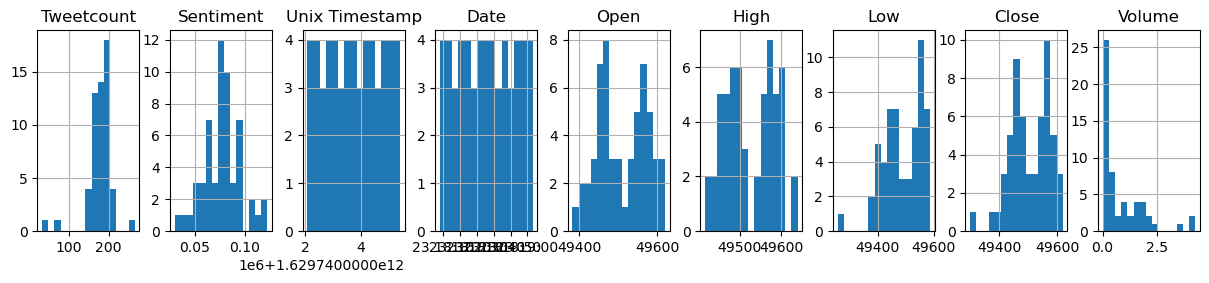

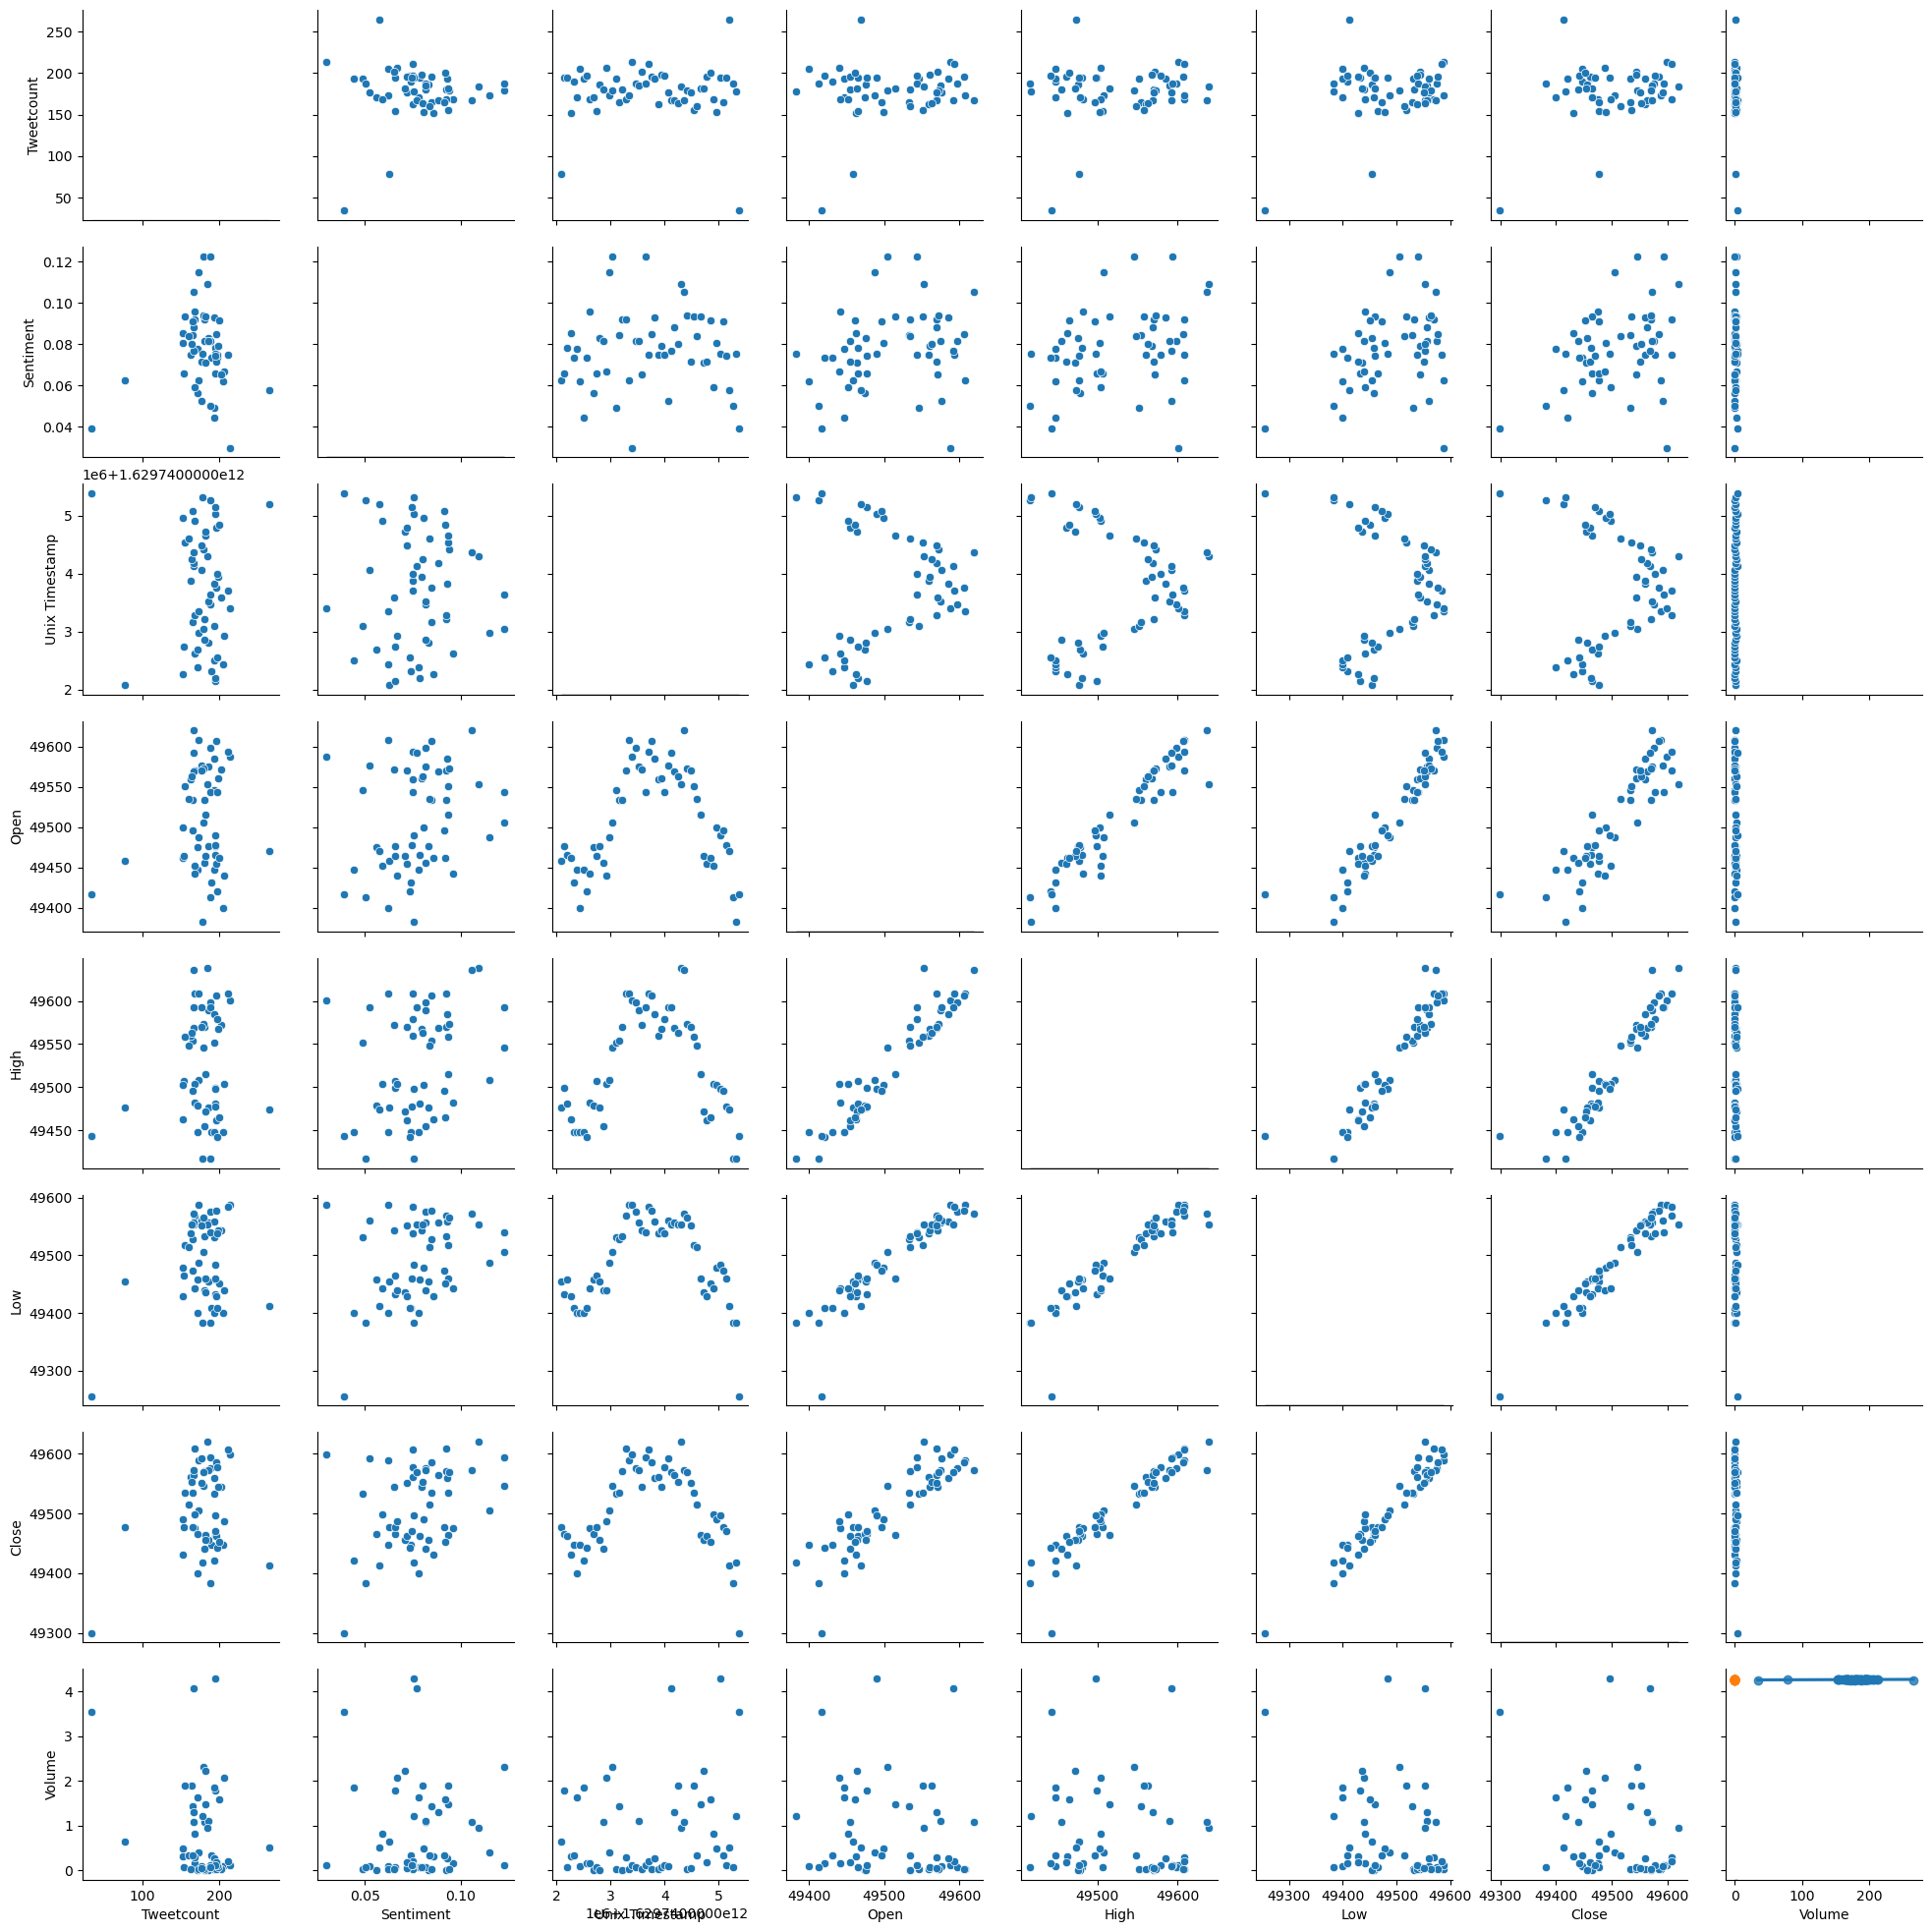

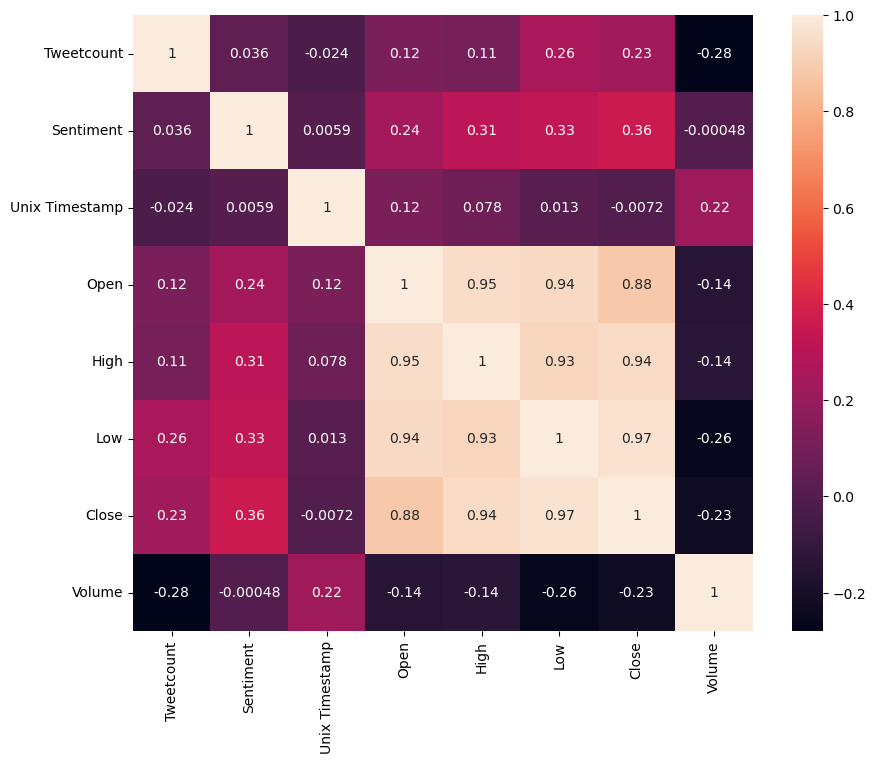

In [12]:
corr_matrix=df.corr(method='pearson')
fig,ax=plt.subplots(figsize=(10,8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
ax=sns.heatmap(corr_matrix, annot=True)
plt.show()

### Import linear regression model

In [68]:
# import libraries
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [14]:
# set the label
y=df['Close']

In [15]:
y.head()

0    49476.79
1    49465.53
2    49462.22
3    49431.21
4    49447.37
Name: Close, dtype: float64

In [16]:
# set the predictors
X=df.drop(['Close', 'Date', 'Symbol', 'High', 'Low', 'Open', 'Unix Timestamp'], axis=1)

In [17]:
X.head()

,Tweetcount,Sentiment,Volume
0,78,0.062761,0.648097
1,194,0.065803,1.774996
2,194,0.078320,0.066821
3,152,0.085463,0.309803
4,190,0.073699,0.321633


In [18]:
# define the model
lm=linear_model.LinearRegression()

In [19]:
# fit the model to my data
line=lm.fit(X,y)
lm.score(X,y)

0.2079518204654629

In [20]:
# look at predictions
predictions = lm.predict(X)
predictions

array([49453.07179509, 49486.04198319, 49523.24950471, 49513.77755407,
       49512.69273124, 49494.76431119, 49505.98835549, 49457.2353015 ,
       49517.00628457, 49534.75517784, 49487.15707741, 49492.56150712,
       49527.37653629, 49509.64502769, 49488.10703064, 49558.31958652,
       49546.46522643, 49485.84624788, 49503.36940587, 49536.36583471,
       49528.5284985 , 49495.54441885, 49467.72177176, 49525.32185884,
       49510.90327494, 49510.08888163, 49576.98408303, 49523.71792375,
       49532.97990589, 49539.12669457, 49508.15600077, 49526.12613451,
       49519.39481311, 49483.9007223 , 49461.48712218, 49510.40772776,
       49491.84612425, 49548.4266933 , 49535.19374647, 49538.11184161,
       49508.68152834, 49505.16734224, 49514.31081544, 49520.7466224 ,
       49482.41437665, 49514.1717054 , 49523.47255473, 49479.52551726,
       49505.77253269, 49467.19635695, 49525.73476755, 49517.89753001,
       49517.63615128, 49485.26507589, 49499.07909776, 49370.64330796])

In [21]:
# check accuracy with r2 score
r2_score(y, predictions)

0.2079518204654629

In [22]:
# check accuracy with MSE
mean_squared_error(y, predictions)

3641.2160258616527

### Machine learning

In [23]:
# import library
from sklearn.preprocessing import Normalizer

In [24]:
# check X
X.head()

,Tweetcount,Sentiment,Volume
0,78,0.062761,0.648097
1,194,0.065803,1.774996
2,194,0.078320,0.066821
3,152,0.085463,0.309803
4,190,0.073699,0.321633


In [45]:
# change y to integer
df.Close = df.Close.astype(int)

In [47]:
# set the label for y as int instead of float 
y=df['Close']

In [48]:
y.head()

0    49476
1    49465
2    49462
3    49431
4    49447
Name: Close, dtype: int32

In [49]:
# normalize descriptive variables with scaler
scaler=Normalizer().fit(X)
scaled=scaler.transform(X)
scaled_X=pd.DataFrame(scaled)
scaled_X.head()

,0,1,2
0,0.999965,0.000805,0.008309
1,0.999958,0.000339,0.009149
2,1.000000,0.000404,0.000344
3,0.999998,0.000562,0.002038
4,0.999998,0.000388,0.001693


In [60]:
# import library
from sklearn.linear_model import LinearRegression

In [61]:
# apply train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=40)

In [62]:
# apply and train model
ln=LinearRegression()

In [63]:
# apply and train model
model=ln.fit(X_train, y_train)

In [64]:
# apply and train model
y_pred=ln.predict(X_test)

In [65]:
# apply and train model
y_pred

array([49527.58121573, 49499.11486946, 49386.8187602 , 49487.92914682,
       49513.97993885, 49538.45104723, 49500.00699442, 49503.0169086 ,
       49527.62468018, 49507.31827197, 49456.97524301, 49502.80023074,
       49563.56913168, 49476.67408522, 49512.2953516 , 49461.61560609,
       49519.83813083])

In [66]:
# evaluate accuracy against test dataset
r2_score(y_test,y_pred)

0.2593603058474294

In [69]:
# evaluate accuracy against test dataset
mean_absolute_error(y_test,y_pred)

58.60287351868165

### Multiclass?

In [52]:
# apply LogisticRegression
classification=LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train, y_train)

In [54]:
probabilities=classification.predict_proba(X_test)
preds=probabilities[:,1]
import sklearn.metrics as metrics
fpr, tpr, treshold=metrics.roc_curve(y_test, preds)
roc=auc=metrics.auc(fpr, tpr)
print(roc_auc)

ValueError: multiclass format is not supported